In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split, cross_val_score
import sklearn.metrics as skmetrics

%matplotlib inline

In [56]:
df = pd.read_csv('grad.csv')
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [57]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [59]:
rank_by_admit = pd.crosstab(df['admit'], df['rank'])

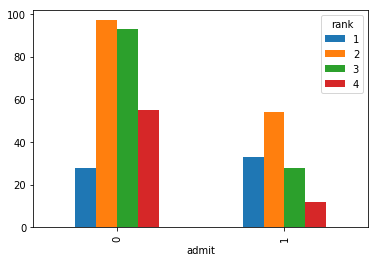

In [60]:
rank_by_admit.plot(kind='bar')

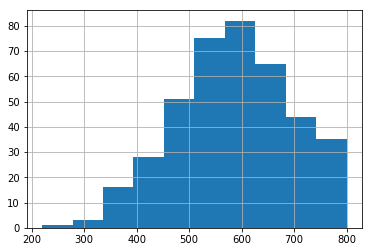

In [61]:
df['gre'].hist()

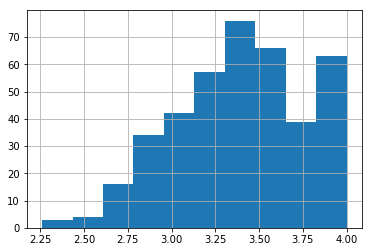

In [62]:
df['gpa'].hist()

In [63]:
df.admit.value_counts()

0    273
1    127
Name: admit, dtype: int64

In [64]:
X = add_constant(df[['gre', 'gpa', 'rank']])
X.head()

,const,gre,gpa,rank
0,1,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,1,520,2.93,4


In [65]:
y = df['admit']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: admit, dtype: int64

In [66]:
model = Logit(y, X).fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.574302
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Thu, 23 Mar 2017   Pseudo R-squ.:                 0.08107
Time:                        16:18:00   Log-Likelihood:                -229.72
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 8.207e-09
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.4495      1.133     -3.045      0.002        -5.670    -1.229
gre            0.0023      0.001      2.101      0.036         0.000     0.004
gpa            0.7770      0.327      2.373      0.018         0.135     1.419
rank          -0.5600      0.127     -4.405      0.000        -0.809    -0.311
==============================================================================
"""

In [67]:
new_model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [68]:
X_train.shape

(300, 4)

In [95]:
accuracy = np.mean(cross_val_score(new_model, X_train, y=y_train, scoring='accuracy'))
precision = np.mean(cross_val_score(new_model, X_train, y=y_train, scoring='precision'))
# total_recall = np.sum(cross_val_score(new_model, X_train, y=y_train, scoring='recall'))
recall = np.mean(cross_val_score(new_model, X_train, y=y_train, scoring='recall'))

array([ 0.68316832,  0.72      ,  0.71717172])

In [70]:
print accuracy, precision, recall

0.706780011334 0.548941798942 0.274193548387


In [73]:
df1 = df.copy()
df1[[1,2,3]] = pd.get_dummies(df1['rank'])[[1,2,3]]
del df1['rank']
del df1['admit']
df1['const'] = 1 
df1.head()

,gre,gpa,1,2,3,const
0,380,3.61,0,0,1,1
1,660,3.67,0,0,1,1
2,800,4.00,1,0,0,1
3,640,3.19,0,0,0,1
4,520,2.93,0,0,0,1


In [80]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1, y)
X_train1.head()

,gre,gpa,1,2,3,const
242,680,2.96,0,0,1,1
9,700,3.92,0,1,0,1
143,580,3.40,0,0,1,1
283,520,3.10,0,0,0,1
313,520,3.65,0,0,0,1


In [81]:
accuracy = np.mean(cross_val_score(new_model, X_train1, y=y_train1, scoring='accuracy'))
precision = np.mean(cross_val_score(new_model, X_train1, y=y_train1, scoring='precision'))
recall = np.mean(cross_val_score(new_model, X_train1, y=y_train1, scoring='recall'))
print accuracy, precision, recall

0.696666666667 0.411111111111 0.0804597701149


In [82]:
model1 = Logit(y, df1).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Thu, 23 Mar 2017   Pseudo R-squ.:                 0.08292
Time:                        16:25:03   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038         0.000     0.004
gpa            0.8040      0.332      2.423      0.015         0.154     1.454
1              1.5515      0.418      3.713      0.000         0.733     2.370
2              0.8760      0.367      2.389      0.017         0.157     1.595
3              0.2113      0.393      0.538      0.591        -0.559     0.981
const         -5.5414      1.138     -4.869      0.000        -7.772    -3.311
==============================================================================
"""

In [83]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list
    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''
    probs_w_labels = pd.DataFrame({
        'probability': probabilities,
        'label': labels
    })
    probs_w_labels = probs_w_labels.sort_values(by='probability')

    TPRs = []
    FPRs = []
    thresholds = []

    for index, row in probs_w_labels.iterrows():
        threshold = row['probability']
        probs_w_labels['classification'] = probs_w_labels['probability'] > threshold

        true_positives = len(probs_w_labels[(probs_w_labels['label'] == True) & (probs_w_labels['classification'] == True)])
        false_positives = len(probs_w_labels[(probs_w_labels['label'] == False) & (probs_w_labels['classification'] == True)])

        true_negatives = len(probs_w_labels[(probs_w_labels['label'] == False) & (probs_w_labels['classification'] == False)])
        false_negatives = len(probs_w_labels[(probs_w_labels['label'] == True) & (probs_w_labels['classification'] == False)])

        tpr = float(true_positives) / (true_positives + false_negatives)
        fpr = float(false_positives) / (false_positives + true_negatives)

        TPRs.append(tpr)
        FPRs.append(fpr)
        thresholds.append(threshold)

    return TPRs, FPRs, thresholds


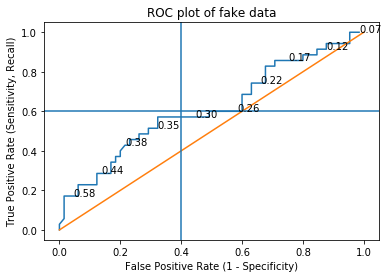

In [98]:
new_model.fit(X_train, y_train)
probabilities = new_model.predict_proba(X_test)[:, 1]

tpr, fpr, thresholds = roc_curve(probabilities, y_test)

plt.plot(fpr, tpr)
points = zip(fpr, tpr)
for i, xy in enumerate(points):
    if i % 10 == 0:
        plt.annotate('{0:.2f}'.format(thresholds[i]), xy=xy)
nums = np.linspace(0,1)
plt.plot(nums, nums)
plt.axhline(.6)
plt.axvline(.4)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of fake data")
plt.show()

In [100]:
np.exp(0.0023)  # GRE FACTOR

1.002302647029

In [102]:
127/273.0  # THE TRUE ODDS

0.4652014652014652

In [105]:
np.exp(0.770)  # GPA FACTOR

2.1597662537849152

In [106]:
np.exp(-0.5600) #RANK FACTOR

0.57120906384881487

In [109]:
import math

In [115]:
math.log(2)/0.0023 # GRE TO DOUBLE ODDS

301.3683393738893

In [116]:
math.log(2)/0.770 # GPA TO DOUBLE ODDS

0.9001911435843445

In [117]:
math.log(2)/-0.56 # RANK TO DOUBLE ODDS

-1.2377628224284736

In [120]:
# const , gre, gpa, rank
matrix = np.array([
    [1,  587, 3.3, 1],
    [1,  587, 3.3, 2],
    [1,  587, 3.3, 3],
    [1,  587, 3.3, 4],
])

In [121]:
matrix.shape

(4, 4)

In [122]:
model = LogisticRegression()
model.fit(X,y)
p_hat = model.predict_proba(matrix)

In [124]:
p_hat[:, 1]

array([ 0.49942893,  0.35692718,  0.2359221 ,  0.14658882])

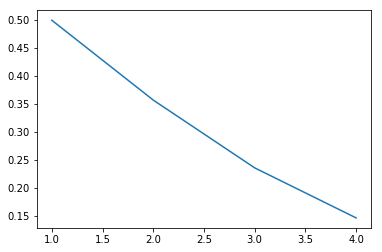

In [126]:
plt.plot(matrix[:,3], p_hat[:, 1])

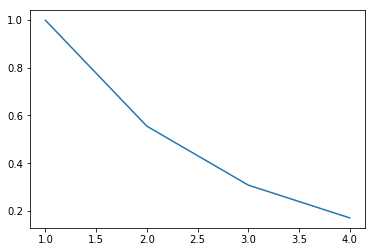

In [127]:
plt.plot(matrix[:,3], p_hat[:, 1]/(1-p_hat[:, 1]))

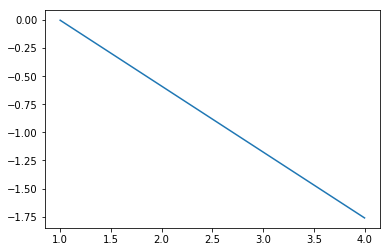

In [130]:
plt.plot(matrix[:,3], np.log(p_hat[:, 1]/(1-p_hat[:, 1])))

In [ ]:
#6 no.